In [236]:
import requests
from datetime import date, timedelta
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_url = 'https://www.opcom.ro/rapoarte-pzu-raportPIP-export-csv/'

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2022,1,2)
end_date = date(2023,3,17)

for single_date in daterange(start_date, end_date):
    date_str = '{d.day}/{d.month}/{d.year}'.format(d=single_date)
    response = requests.get(base_url+f'{date_str}/ro', verify=False)
    while response.status_code != 200:
        response = requests.get(base_url+f'{date_str}/ro', verify=False)
    lines = response.content.decode().splitlines()
    file_name = date_str.replace("/","-")
    with open(f'./raw_folders/{file_name}.csv', mode='w', newline='') as file:
        writer = csv.writer(file, delimiter=',')
        for line in lines:
            row = line.split(',')
            writer.writerow(row)

In [238]:
mean_prices = {}
for csv in os.listdir('./raw_folders/'):
    df = pd.read_csv(f'./raw_folders/{csv}', skiprows=7)
    mean = df['"Pret de Inchidere a Pietei [lei/MWh]"'].apply(lambda x: float(x.strip('"'))).mean()
    mean_prices[csv[:-4]] = mean  

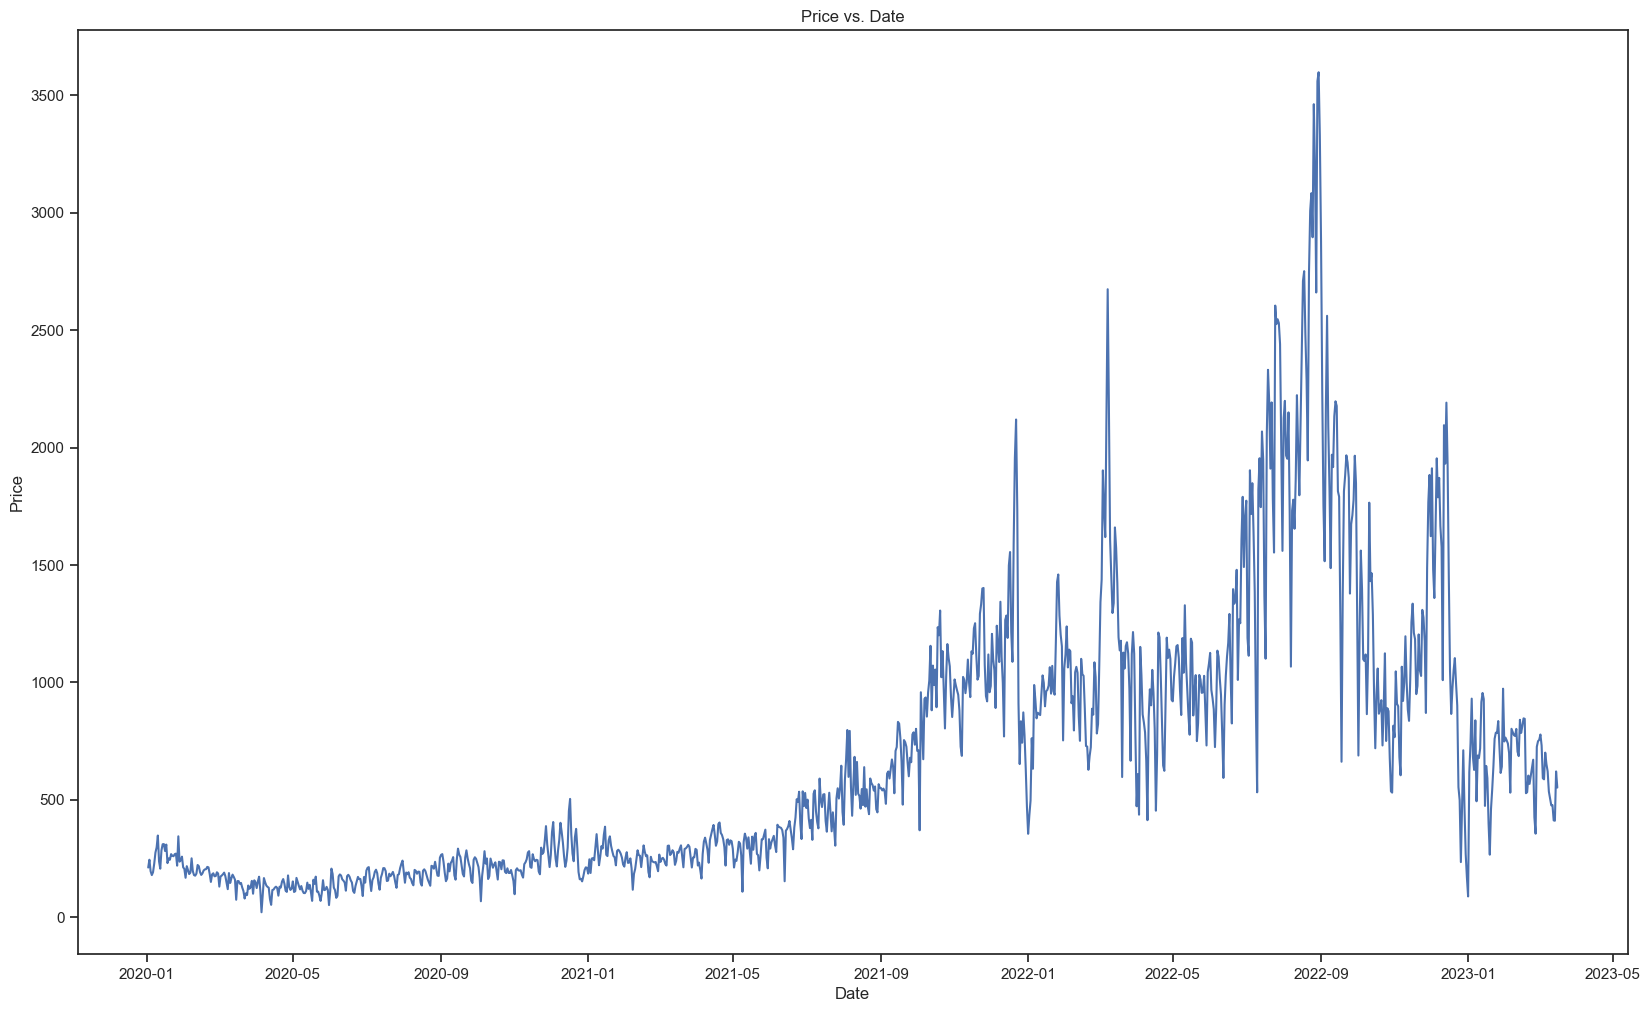

In [247]:
df = pd.DataFrame(mean_prices.items(), columns=['date', 'price'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.sort_values(by='date', inplace=True)
df = df[df['date'] > '2020-01-01']

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df['date'], df['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price vs. Date')
plt.show()